<a href="https://colab.research.google.com/github/Adasyam31494/Generative-AI-with-Large-Language-Models/blob/main/normalizing_flow_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow matplotlib scikit-learn

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

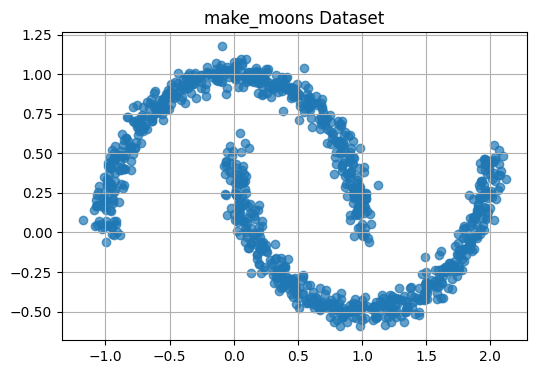

In [7]:
data, _ = make_moons(n_samples=1000, noise=0.05)
data = data.astype("float32")

plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title("make_moons Dataset")
plt.grid(True)
plt.show()

In [8]:
class CouplingLayer(layers.Layer):
    def __init__(self, input_dim, mask, **kwargs):
        super(CouplingLayer, self).__init__(**kwargs)
        self.input_dim = input_dim
        self.mask = tf.constant(mask, dtype=tf.float32)

        self.scale_net = keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(input_dim, activation='tanh')
        ])

        self.trans_net = keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(input_dim)
        ])

    def call(self, x, inverse=False):
        x_masked = x * self.mask
        s = self.scale_net(x_masked) * (1 - self.mask)
        t = self.trans_net(x_masked) * (1 - self.mask)

        if inverse:
            y = (x - t) * tf.exp(-s)
        else:
            y = x * tf.exp(s) + t
        return y

In [9]:
class RealNVP(keras.Model):
    def __init__(self, input_dim, num_coupling_layers=6):
        super(RealNVP, self).__init__()
        self.layers_list = []
        for i in range(num_coupling_layers):
            mask = [i % 2, (i + 1) % 2]
            self.layers_list.append(CouplingLayer(input_dim, mask))

    def call(self, x, inverse=False):
        if not inverse:
            for layer in self.layers_list:
                x = layer(x, inverse=False)
        else:
            for layer in reversed(self.layers_list):
                x = layer(x, inverse=True)
        return x

In [10]:
def nll_loss(y_true, y_pred):
    log_det_jacobian = 0.0
    for layer in model.layers_list:
        x_masked = y_pred * layer.mask
        s = layer.scale_net(x_masked) * (1 - layer.mask)
        log_det_jacobian += tf.reduce_sum(s, axis=1)
    base_log_prob = -0.5 * tf.reduce_sum(tf.square(y_pred), axis=1)
    return -tf.reduce_mean(base_log_prob + log_det_jacobian)

In [11]:
input_dim = 2
model = RealNVP(input_dim)
model.compile(optimizer='adam', loss=nll_loss)

In [12]:
history = model.fit(data, data, epochs=600, batch_size=256, verbose=1)

Epoch 1/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.4064
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -0.2036
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -0.4320
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -0.6970
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: -0.9590
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: -1.1471
Epoch 7/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: -1.3390
Epoch 8/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: -1.5165
Epoch 9/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -1.7381
Epoch 10/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: -1.9777
Epoch 11/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -2.1782
Epoch 12/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: -2.4399
Epoch 13/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: -2.6888
Epoch 14/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: -2.9362
Epoch 15/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: -3.1282
Epoc

In [13]:
history = model.fit(data, data, epochs=600, batch_size=256, verbose=1)

Epoch 1/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: -5.9086
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: -5.9134
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: -5.9146
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: -5.9139
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: -5.9149
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: -5.9157
Epoch 7/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: -5.9162
Epoch 8/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: -5.9164
Epoch 9/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: -5.9154
Epoch 10/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: -5.9178
Epoch 11/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: -5.9186
Epoch 12/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: -5.9188
Epoch 13/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: -5.9190
Epoch 14/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: -5.9190
Epoch 15/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: -5.9176
Epoc

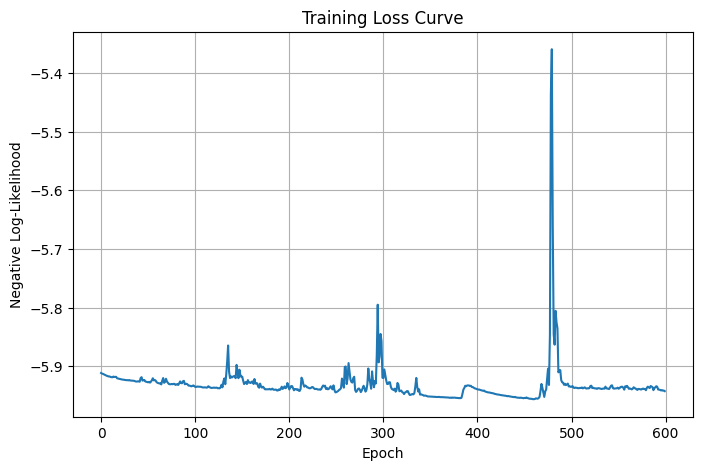

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.grid(True)
plt.savefig("loss_curve.png")
plt.show()

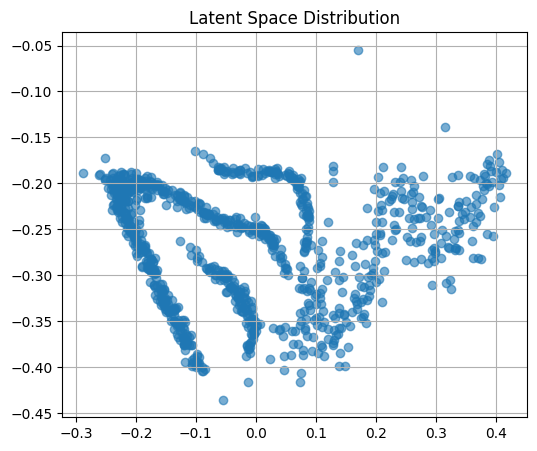

In [16]:
z = model(data)
plt.figure(figsize=(6, 5))
plt.scatter(z[:, 0], z[:, 1], alpha=0.6)
plt.title("Latent Space Distribution")
plt.grid(True)
plt.savefig("latent_space.png")
plt.show()

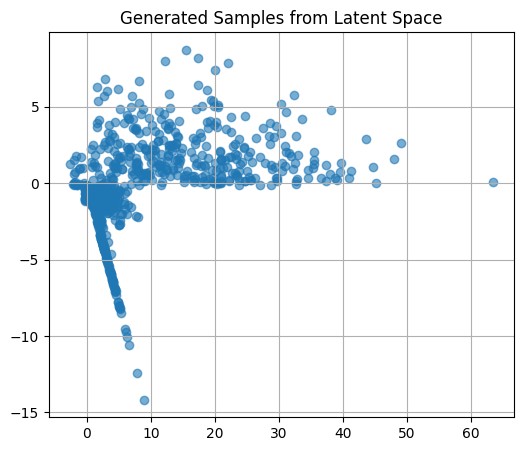

In [17]:
noise = tf.random.normal(shape=(1000, 2))
generated = model(noise, inverse=True)
plt.figure(figsize=(6, 5))
plt.scatter(generated[:, 0], generated[:, 1], alpha=0.6)
plt.title("Generated Samples from Latent Space")
plt.grid(True)
plt.savefig("generated_samples.png")
plt.show()